In [2]:
import matplotlib.pyplot as plt
import numpy as np
from svm import *

# Support Vector Machines
From course : [DD2421 Machine Learning](https://www.kth.se/student/kurser/kurs/DD2421?l=en) - Lab 2: Support Vector Machines.

## Linear kernel
### Linearly separable data

Optimization terminated successfully.


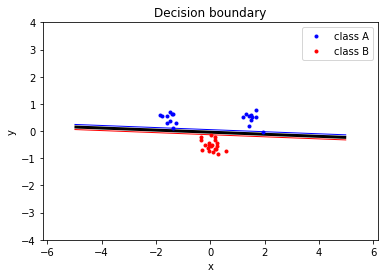

In [3]:
classA, classB, inputs, targets = gen_data()
svm = SVM(inputs, targets, "linear")
if(svm.fit(verbose=True)):
    plot_data(classA, classB)
    svm.plot_decision_boundary()

### Non-linearly separable data

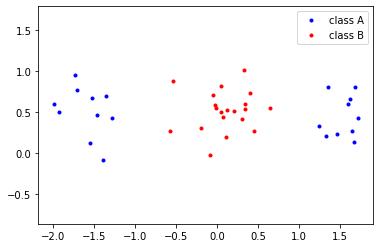

Iteration limit exceeded


In [2]:
classA, classB, inputs, targets = gen_data(meanA1=[1.5, 0.5], meanA2=[-1.5, 0.5], meanB=[0.0, 0.5])
svm = SVM(inputs, targets, "linear")
plot_data(classA, classB)
plt.show()
if(svm.fit(verbose=True)):
    plot_data(classA, classB)
    svm.plot_decision_boundary()

**Conclusion**: The linear kernel cannot help classifying this non-linearly separable data, beacause this kernel corresponds to a simple structural risk minimisation in 2-dimensions, there is no projection into higher-dimensional space here.

## Non-linear kernels
### Polynomial kernel

Optimization terminated successfully.


ValueError: num must be 1 <= num <= 3, not 0

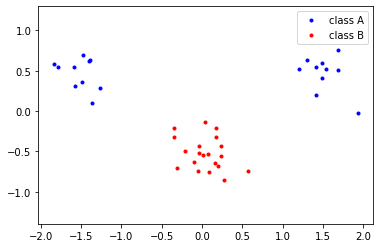

In [4]:
plot_data(classA, classB)
p = np.array([2, 5, 10])
for i in range(len(p)):
    svm = SVM(inputs, targets, "polynomial", p[i])
    if(svm.fit(verbose=True)):
        plt.subplot(1, len(p), i)
        svm.plot_decision_boundary()
plt.show()

The parameter $p$ of the polynomial kernel function here is the dimension of the space we want to project our data in (i.e. degree of the polynomial). 

In terms of bias-variance trade-off, $p$ can be seen as the number of degrees of freedom of the model, so as $p$ increases, the variance increases and the bias decreases.

### Radial Basis Function (RBF) kernel

Optimization terminated successfully.


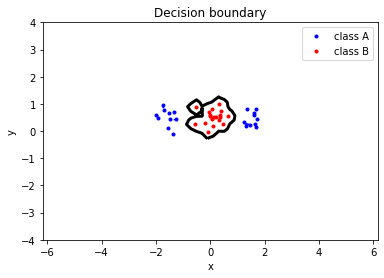

In [5]:
svm = SVM(inputs, targets, "rbf", 0.1)
if(svm.fit(verbose=True)):
    plot_data(classA, classB)
    svm.plot_decision_boundary()

This kernel uses the euclidian distance between the pairs of points, the parameter $\sigma$ controls the smoothness of the boudary. 

From a bias-variance trade-off perspective, as $\sigma$ increases the bias decreases and the variance increases.

## Slack variables
### Large C

Optimization terminated successfully.


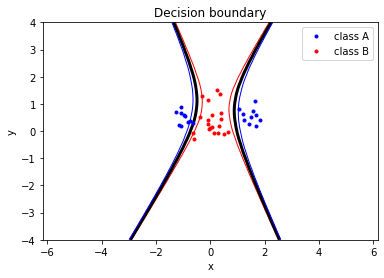

In [29]:
classA, classB, inputs, targets = gen_data(sizeB = 0.5, meanA1=[1.5, 0.5], meanA2=[-1, 0.5], meanB=[0, 0.5])
svm = SVM(inputs, targets, "polynomial", 2, 10)
if(svm.fit(verbose=True)):
    plot_data(classA, classB)
    svm.plot_decision_boundary()

### Low C

Optimization terminated successfully.


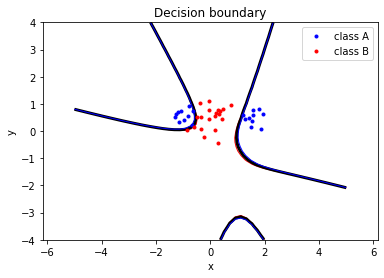

In [24]:
classA, classB, inputs, targets = gen_data(sizeB = 0.5, meanA1=[1.5, 0.5], meanA2=[-1, 0.5], meanB=[0, 0.5])
svm = SVM(inputs, targets, "polynomial", 3)
if(svm.fit(verbose=True)):
    plot_data(classA, classB)
    svm.plot_decision_boundary()

### Conclusions
The slack parameter $C$ (`slack_C` in the SVM constructor) sets the relative importance of avoiding slack versus getting a wider margin. For large $C$ the SVM penalizes more slack values, for low $C$ there are more.

If we have noisy data we want our $C$ to be low, allowing more slack since individual datapoints in strange location should not be taken too seriously.

## Conclusion

+ SVMs are quite good at finding reasonable decision boundaries from small set of training data.
